# Debug: Check target_returns in BacktestResult
This notebook loads a saved BacktestResult and inspects the `target_returns` used for plotting.

In [13]:
import joblib
import os

results_dir = './results/'
model_name = 'linear'  # Change as needed
result_path = os.path.join(results_dir, model_name, f'{model_name}_best_model.joblib')

assert os.path.exists(result_path), f"File not found: {result_path}"
loaded = joblib.load(result_path)

best_result = loaded.get("best_result", None)
best_result.target_returns
print("Keys in loaded file:", list(loaded.keys()))
print("Type of best_results:", type(best_result))

best_config = loaded.get("best_config", None)
print("Type of best_config:", type(best_config))

if best_config is not None:
    print("Keys in best_config:", list(best_config.keys()))
    for k, v in best_config.items():
        print(f"{k}: {v}")
else:
    print("No best_config found in loaded file.")

Keys in loaded file: ['best_result', 'best_config']
Type of best_results: <class 'src.cclasses.BacktestResult'>
Type of best_config: <class 'dict'>
Keys in best_config: ['model_name', 'model_params', 'rolling_window', 'step', 'metric_key', 'metric_value']
model_name: LinearRegression
model_params: {}
rolling_window: 156
step: 1
metric_key: information_ratio
metric_value: -0.8403523519346433


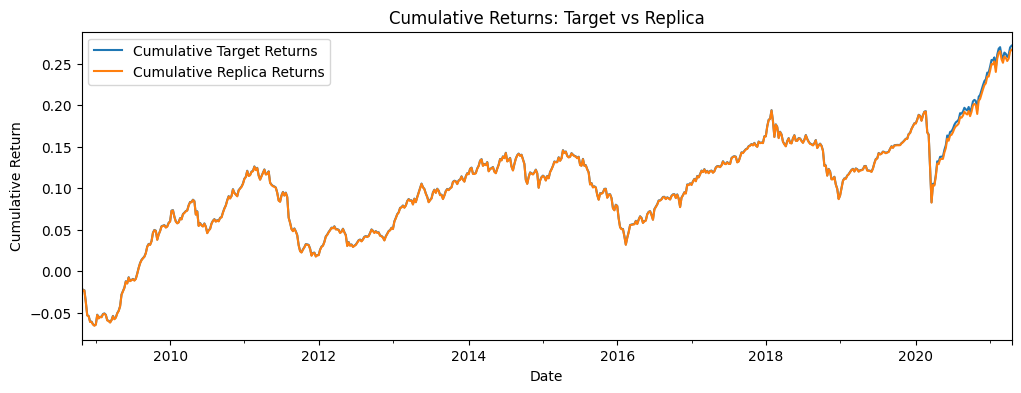

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

if hasattr(best_result, "target_returns") and hasattr(best_result, "replica_returns"):
    if isinstance(best_result.target_returns, pd.Series) and isinstance(best_result.replica_returns, pd.Series):
        plt.figure(figsize=(12, 4))
        best_result.target_returns.cumsum().plot(label="Cumulative Target Returns")
        best_result.replica_returns.cumsum().plot(label="Cumulative Replica Returns")
        plt.title("Cumulative Returns: Target vs Replica")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.show()
    else:
        print("target_returns or replica_returns is not a pd.Series.")
else:
    print("best_result does not have target_returns and/or replica_returns.")

In [3]:
import joblib
import os
import matplotlib.pyplot as plt
import pandas as pd

# Set this to your results directory
results_dir = './results/'
model_name = 'linear'  # Change to the model you want to check
result_path = os.path.join(results_dir, model_name, f'{model_name}_best_model.joblib')

assert os.path.exists(result_path), f"File not found: {result_path}"
result_obj = joblib.load(result_path)
best_config = result_obj["best_config"]
print(f"Loaded object type: {type(best_config)}")
if hasattr(best_config, '__dict__'):
    print("Attributes:", list(best_config.__dict__.keys()))

# Check for config attribute
if hasattr(best_config, 'config'):
    print("Found 'config' attribute in result_obj.")
    print("Config keys:", list(result_obj.config.keys()))
else:
    print("No 'config' attribute in result_obj.")

# Check for target_returns in both places
target_returns_main = getattr(result_obj, 'target_returns', None)
target_returns_config = None
if hasattr(result_obj, 'config') and 'target_returns' in result_obj.config:
    target_returns_config = result_obj.config['target_returns']

print("\n--- target_returns in main object ---")
if target_returns_main is not None:
    print(type(target_returns_main))
    if isinstance(target_returns_main, pd.Series):
        print(target_returns_main.head())
    else:
        print(str(target_returns_main)[:300])
else:
    print("Not found.")

print("\n--- target_returns in config ---")
if target_returns_config is not None:
    print(type(target_returns_config))
    if isinstance(target_returns_config, pd.Series):
        print(target_returns_config.head())
    else:
        print(str(target_returns_config)[:300])
else:
    print("Not found.")

# Check for index_weights in both places
index_weights_main = getattr(result_obj, 'index_weights', None)
index_weights_config = None
if hasattr(result_obj, 'config') and 'index_weights' in result_obj.config:
    index_weights_config = result_obj.config['index_weights']

print("\n--- index_weights in main object ---")
print(index_weights_main if index_weights_main is not None else "Not found.")

print("\n--- index_weights in config ---")
print(index_weights_config if index_weights_config is not None else "Not found.")

# Plot both target_returns if both exist
if isinstance(target_returns_main, pd.Series) or isinstance(target_returns_config, pd.Series):
    plt.figure(figsize=(12,4))
    if isinstance(target_returns_main, pd.Series):
        target_returns_main.cumsum().plot(label='target_returns (main)')
    if isinstance(target_returns_config, pd.Series):
        target_returns_config.cumsum().plot(label='target_returns (config)')
    plt.legend()
    plt.title('Cumulative Target Returns: Main vs Config')
    plt.show()

Loaded object type: <class 'dict'>
No 'config' attribute in result_obj.

--- target_returns in main object ---
Not found.

--- target_returns in config ---
Not found.

--- index_weights in main object ---
Not found.

--- index_weights in config ---
Not found.


In [ ]:
# Optional: Plot target_returns
if 'target_returns' in locals():
    plt.figure(figsize=(12,4))
    if isinstance(target_returns, pd.Series):
        target_returns.cumsum().plot(title='Cumulative Target Returns (Monster Index)')
    else:
        plt.plot(target_returns)
        plt.title('Target Returns (Monster Index)')
    plt.show()

In [ ]:
# Optional: Check what weights were used (if stored)
if hasattr(result_obj, 'index_weights'):
    print("index_weights:", result_obj.index_weights)
elif hasattr(result_obj, 'config') and 'index_weights' in result_obj.config:
    print("index_weights from config:", result_obj.config['index_weights'])
else:
    print("No index_weights found in BacktestResult.")